[PyTorch Autograd Explained - In-depth Tutorial](https://www.youtube.com/watch?v=MswxJw-8PvE)

In [99]:
import torch
import numpy as np

In [7]:
#Ex1
a = torch.tensor(2.0 , requires_grad = True)
b = torch.tensor(3.0 , requires_grad = False)

c = a + b

print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn},')

a: True, b: False, c: True
a: None, b: None, c: <AddBackward0 object at 0x7e2f84a00850>,


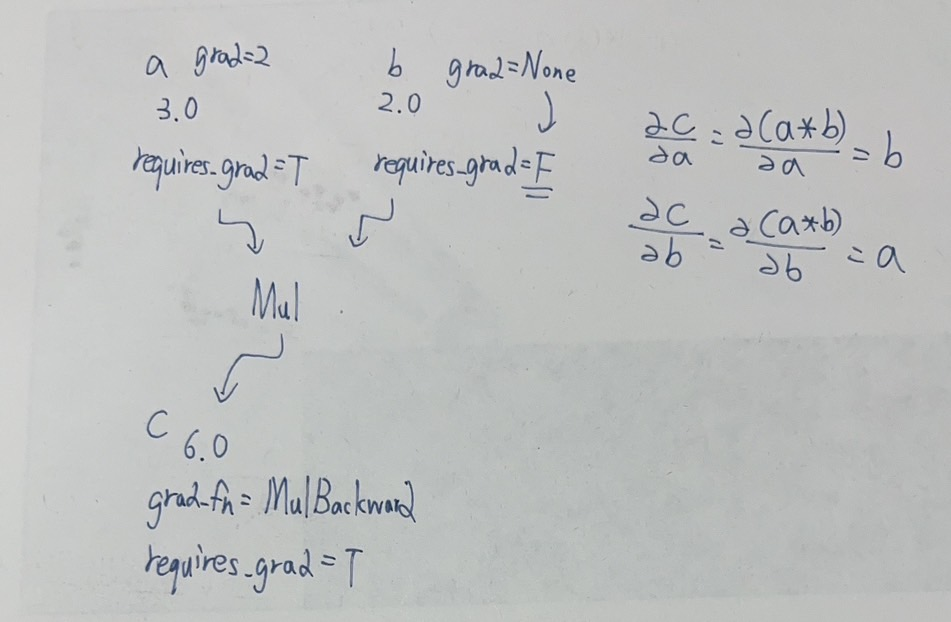

In [16]:
#Ex2
a = torch.tensor(2.0 , requires_grad = True)
b = torch.tensor(3.0 , requires_grad = True)

c = a * b

print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}')

a: True, b: True, c: True
a: None, b: None, c: <MulBackward0 object at 0x7e2eb363b7c0>


In [17]:
d = torch.tensor(4.0 , requires_grad = True)
e = c * d
e.backward()
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}')
print(f'a: {a.grad}, b: {b.grad}, d: {d.grad}')

a: True, b: True, c: True, d: True, e: True
a: None, b: None, c: <MulBackward0 object at 0x7e2eb36381f0>, d: None, e: <MulBackward0 object at 0x7e2eb36381f0>
a: 12.0, b: 8.0, d: 6.0


In [27]:
#Ex3
a = torch.tensor(2.0 , requires_grad = True)
b = torch.tensor(3.0 , requires_grad = True)

c = a * b

print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}')

a: True, b: True, c: True
a: None, b: None, c: <MulBackward0 object at 0x7e2eb3636980>


In [28]:
d = torch.tensor(4.0 , requires_grad = True)
e = c + d
c += 1
e.backward()
print(f'c: {c._version}')
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}')
print(f'a: {a.grad}, b: {b.grad}, d: {d.grad}')

c: 1
a: True, b: True, c: True, d: True, e: True
a: None, b: None, c: <AddBackward0 object at 0x7e2eb36360b0>, d: None, e: <AddBackward0 object at 0x7e2eb36360b0>
a: 3.0, b: 2.0, d: 1.0


>因為 c += 1 改變了Mulbackward > addbackward節點

> 所以e = c * d 要改成 e = c + d 否則 c : Add 與 e : Mul 將無法倒傳遞

In [31]:
#Ex3 (範例無法執行)
a = torch.tensor(2.0 , requires_grad = True)
b = torch.tensor(3.0 , requires_grad = True)
c = a * b
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}')

a: True, b: True, c: True
a: None, b: None, c: <MulBackward0 object at 0x7e2eb3634d90>


In [32]:
d = torch.tensor(4.0 , requires_grad = True)
e = c * d
c += 1
e.backward()
print(f'c: {c._version}')
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}')
print(f'a: {a.grad}, b: {b.grad}, d: {d.grad}')

RuntimeError: ignored

In [50]:
#Ex4
a = torch.tensor(([1.0 , 2.0 , 3.0]), requires_grad = True)

b, c, d = a.unbind()
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}')

a: True, b: True, c: True, d: True
a: None, b: <UnbindBackward0 object at 0x7e2ea9debd00>, c: <UnbindBackward0 object at 0x7e2ea9debd00>, d: <UnbindBackward0 object at 0x7e2ea9debd00>


In [51]:
e = b * c * d
e.backward()
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}')
print(f'a: {a.grad}, b: {b.grad}, c: {c.grad}, d: {d.grad}')

a: True, b: True, c: True, d: True, e: True
a: None, b: <UnbindBackward0 object at 0x7e2ea9deba60>, c: <UnbindBackward0 object at 0x7e2ea9deba60>, d: <UnbindBackward0 object at 0x7e2ea9deba60>, e: <MulBackward0 object at 0x7e2ea9deba60>
a: tensor([6., 3., 2.]), b: None, c: None, d: None


<ipython-input-51-15582e7d6374>:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(f'a: {a.grad}, b: {b.grad}, c: {c.grad}, d: {d.grad}')


In [90]:
#Ex5
a = torch.tensor(2.0 , requires_grad = False)
b = torch.tensor(2.0 , requires_grad = False)

c = a * b
c.requires_grad = True
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}')

a: False, b: False, c: True
a: None, b: None, c: None


In [91]:
d = torch.tensor(2.0 , requires_grad = False)
e = c * d
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}')
print(f'a: {a.grad}, b: {b.grad}, c: {c.grad}, d: {d.grad}')

a: False, b: False, c: True, d: False, e: True
a: None, b: None, c: None, d: None, e: <MulBackward0 object at 0x7e2eb5d53460>
a: None, b: None, c: None, d: None


In [92]:
f = torch.tensor(2.0 , requires_grad = False)
g = e * f
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}, f: {f.requires_grad}, g: {g.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}, f: {f.grad_fn}, g: {g.grad_fn}')
print(f'a: {a.grad}, b: {b.grad}, c: {c.grad}, d: {d.grad} f: {f.grad}')

a: False, b: False, c: True, d: False, e: True, f: False, g: True
a: None, b: None, c: None, d: None, e: <MulBackward0 object at 0x7e2ea9e59cc0>, f: None, g: <MulBackward0 object at 0x7e2ea9e59cc0>
a: None, b: None, c: None, d: None f: None


In [93]:
h = torch.tensor(2.0 , requires_grad = True)
i = g / h
i.retain_grad() #important
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}, f: {f.requires_grad}, g: {g.requires_grad}, h: {h.requires_grad}, i: {i.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}, f: {f.grad_fn}, g: {g.grad_fn}, h: {h.grad_fn}, i: {i.grad_fn}')

a: False, b: False, c: True, d: False, e: True, f: False, g: True, h: True, i: True
a: None, b: None, c: None, d: None, e: <MulBackward0 object at 0x7e2ea9e58520>, f: None, g: <MulBackward0 object at 0x7e2ea9e58520>, h: None, i: <DivBackward0 object at 0x7e2ea9e58520>


In [94]:
j = i + h
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}, f: {f.requires_grad}, g: {g.requires_grad}, h: {h.requires_grad}, i: {i.requires_grad}, j: {j.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}, f: {f.grad_fn}, g: {g.grad_fn}, h: {h.grad_fn}, i: {i.grad_fn}, j: {j.grad_fn}')

a: False, b: False, c: True, d: False, e: True, f: False, g: True, h: True, i: True, j: True
a: None, b: None, c: None, d: None, e: <MulBackward0 object at 0x7e2ea9e5bb50>, f: None, g: <MulBackward0 object at 0x7e2ea9e5bb50>, h: None, i: <DivBackward0 object at 0x7e2ea9e5bb50>, j: <AddBackward0 object at 0x7e2ea9e5bb50>


In [95]:
k = j * i
print(k)
k.backward()
print(f'a: {a.requires_grad}, b: {b.requires_grad}, c: {c.requires_grad}, d: {d.requires_grad}, e: {e.requires_grad}, f: {f.requires_grad}, g: {g.requires_grad}, h: {h.requires_grad}, i: {i.requires_grad}, j: {j.requires_grad}, k: {k.requires_grad}')
print(f'a: {a.grad_fn}, b: {b.grad_fn}, c: {c.grad_fn}, d: {d.grad_fn}, e: {e.grad_fn}, f: {f.grad_fn}, g: {g.grad_fn}, h: {h.grad_fn}, i: {i.grad_fn}, j: {j.grad_fn}, k: {k.grad_fn}')


tensor(80., grad_fn=<MulBackward0>)
a: False, b: False, c: True, d: False, e: True, f: False, g: True, h: True, i: True, j: True, k: True
a: None, b: None, c: None, d: None, e: <MulBackward0 object at 0x7e2eb3638700>, f: None, g: <MulBackward0 object at 0x7e2eb3638700>, h: None, i: <DivBackward0 object at 0x7e2eb3638700>, j: <AddBackward0 object at 0x7e2eb3638700>, k: <MulBackward0 object at 0x7e2eb3638700>


In [96]:
print(f'a: {a.grad}, b: {b.grad}, c: {c.grad}, d: {d.grad} f: {f.grad}, h: {h.grad}, i: {i.grad}')
#i 因為retain_grad 才能夠保留住梯度值

a: None, b: None, c: 36.0, d: None f: None, h: -64.0, i: 18.0


In [100]:
m = k.detach()
m
#將值分離出來

tensor(80.)

In [104]:
n = k.item()
n

80.0

In [105]:
o = k.tolist()
o

80.0